### The dataset "Spotify_final_dataset" was found on and downloaded from Kaggle


#### Column name explanation:

Position - Spotify Ranking

Artist Name - Artist Name

Song Name - Song Name

Days - No of days since the release of the song (Updated)

Top 10 (xTimes) - No of times inside top 10

Peak Position - Peak position attained (1,2,3)

Peak Position (xTimes) - No of times Peak position attained

Peak Streams - Total no of streams during Peak position

Total Streams - Total song streams

## Data cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv file
df = pd.read_csv("Spotify_final_dataset.csv")

In [3]:
# explore the first 20 rows of the dataset
df.head(20)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961
5,6,Travis Scott,goosebumps,1995,4.0,8,0,977275,672972704
6,7,The Weeknd,Blinding Lights,1100,233.0,1,(x11),2355059,644287953
7,8,XXXTENTACION,Jocelyn Flores,1673,44.0,2,(x1),3175206,624457164
8,9,XXXTENTACION,SAD!,1217,133.0,1,(x6),4437612,619879245
9,10,Juice WRLD,All Girls Are The Same,1681,2.0,5,0,1239152,613872384


In [4]:
df.describe()

,Position,Days,Top 10 (xTimes),Peak Position,Peak Streams,Total Streams
count,11084.000000,11084.000000,11084.000000,11084.000000,1.108400e+04,1.108400e+04
mean,5542.500000,53.366925,2.713641,83.070101,5.529469e+05,1.830891e+07
std,3199.819526,129.750902,15.604130,58.932049,6.282936e+05,5.219383e+07
min,1.000000,1.000000,0.000000,1.000000,4.432300e+04,4.432300e+04
25%,2771.750000,2.000000,0.000000,29.000000,2.431595e+05,3.824272e+05
50%,5542.500000,7.000000,0.000000,75.000000,3.505885e+05,1.704876e+06
75%,8313.250000,39.000000,0.000000,132.000000,5.963382e+05,1.078333e+07
max,11084.000000,2547.000000,302.000000,200.000000,7.786096e+06,8.833697e+08


In [5]:
# explore data types in each column
df.dtypes

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)     object
Peak Streams                int64
Total Streams               int64
dtype: object

In [6]:
# column "Top 10 (xTimes)": float -> integer
df["Top 10 (xTimes)"] = df["Top 10 (xTimes)"].astype(int)

In [7]:
# column "Peak Position (xTimes)": object -> integer
# (x29) -> 29

# step 1: remove parentheses & "x"
df["Peak Position (xTimes)"] = df["Peak Position (xTimes)"].str.replace('(','').str.replace(')','').str.replace('x','')
#.str.replace('(', '').str.replace(')', '').str.replace('x', '').astype(int)

# step 2: object -> integer
df["Peak Position (xTimes)"] = df["Peak Position (xTimes)"].astype(int)

/var/folders/y_/_jftc6hs4kz3g6nj1rrbj6lr0000gn/T/ipykernel_22137/406660764.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Peak Position (xTimes)"] = df["Peak Position (xTimes)"].str.replace('(','').str.replace(')','').str.replace('x','')


In [8]:
df.dtypes

Position                   int64
Artist Name               object
Song Name                 object
Days                       int64
Top 10 (xTimes)            int64
Peak Position              int64
Peak Position (xTimes)     int64
Peak Streams               int64
Total Streams              int64
dtype: object

In [9]:
# add column "Avg Streams"

df["Avg Streams"] = df["Total Streams"]/df["Days"]
df["Avg Streams"] = df["Avg Streams"].apply(lambda x: round(x, 2))
df.head(10)

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Avg Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,29,2118242,883369738,586566.89
1,2,Juice WRLD,Lucid Dreams,1673,178,1,20,2127668,864832399,516935.09
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,4,1660502,781153024,421561.26
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487,288518.84
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961,587789.01
5,6,Travis Scott,goosebumps,1995,4,8,0,977275,672972704,337329.68
6,7,The Weeknd,Blinding Lights,1100,233,1,11,2355059,644287953,585716.32
7,8,XXXTENTACION,Jocelyn Flores,1673,44,2,1,3175206,624457164,373255.93
8,9,XXXTENTACION,SAD!,1217,133,1,6,4437612,619879245,509350.24
9,10,Juice WRLD,All Girls Are The Same,1681,2,5,0,1239152,613872384,365182.86


In [10]:
# null values
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
Avg Streams               0
dtype: int64

In [11]:
# drop null values
df = df.dropna()

# finish cleansing the data frame

In [12]:
# new dataframe without null values
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
Avg Streams               0
dtype: int64

## Analyses

In [13]:
# Song with the most times of peak position (1,2,3)

max_pp = df['Peak Position (xTimes)'].max()
df[df['Peak Position (xTimes)']==max_pp]

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Avg Streams
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961,587789.01


In [14]:
# Songs with 100+ times of peak position (1,2,3)

df[df['Peak Position (xTimes)'] >= 100]

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,Avg Streams
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961,587789.01
22,23,Drake,One Dance,772,187,1,103,2767175,454267392,588429.26


In [15]:
# Recently released songs (within 100 days) that have ever made it to #1 (Peak Position = 1)


df.loc[ (df["Days"] <= 100) & (df["Peak Position"] == 1)][['Artist Name','Song Name','Peak Position (xTimes)']].value_counts()

Artist Name                        Song Name                                                  Peak Position (xTimes)
Bad Bunny                          Dakiti                                                     1                         1
Beyoncé                            I'M THAT GIRL                                              1                         1
The Weeknd                         Sacrifice                                                  2                         1
Taylor Swift                       Shake It Off                                               41                        1
                                   ME!                                                        3                         1
                                   Love Story (Taylor’s Version)                              1                         1
                                   AntiHero                                                   14                        1
Sam Smith                    

In [16]:
# Artists with the highest number of songs

df['Artist Name'].value_counts()

Drake              208
Future             190
Taylor Swift       172
Logic              120
Trippie Redd       114
                  ... 
Lil Adrei            1
Etta James           1
HRVY                 1
Lean Trap            1
The Band Perry       1
Name: Artist Name, Length: 1608, dtype: int64

In [17]:
# Artists with the highest number of songs inside top 10

# create a new dataframe 'df_top10' where songs made it to top 10 at least once
df_top10 = df[df['Top 10 (xTimes)'] >= 1]


df_top10['Artist Name'].value_counts()


# Drake has the most songs that stay in top 10

Drake               88
Taylor Swift        65
The Weeknd          41
Ariana Grande       39
Post Malone         37
                    ..
Carolina Gaitán      1
Mark Ronson          1
Frank Sinatra        1
Jack Ü               1
YG                   1
Name: Artist Name, Length: 275, dtype: int64

In [18]:
# Artists whose songs have the highest number of times inside top 10

df_top10.groupby('Artist Name')['Top 10 (xTimes)'].sum().sort_values(ascending=False)

# Drake's songs have the most times inside top 10

Artist Name
Drake              2364
Post Malone        1706
The Weeknd         1157
Ariana Grande       769
Justin Bieber       675
                   ... 
Coolio                1
Maluma                1
Rod Wave              1
Russ                  1
Ray Parker Jr.        1
Name: Top 10 (xTimes), Length: 275, dtype: int64

## Visualization

In [19]:
avg_daily_str = df["Avg Streams"].mean()
avg_daily_str

287165.51579783426

<AxesSubplot:xlabel='Days', ylabel='Total Streams'>

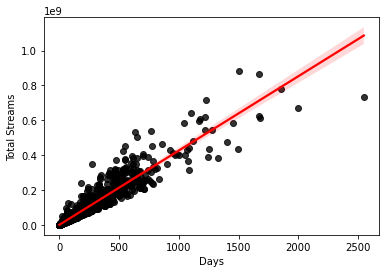

In [20]:
# Correlation between Days (since release) and Total Streams among songs above mean Avg Streams

df1 = df[ df["Avg Streams"] > avg_daily_str]
sns.regplot(x="Days", y="Total Streams", data=df1, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# For songs whose daily streams are above average, the longer they are released, the higher streams they have
# Highly correlated

<AxesSubplot:xlabel='Days', ylabel='Total Streams'>

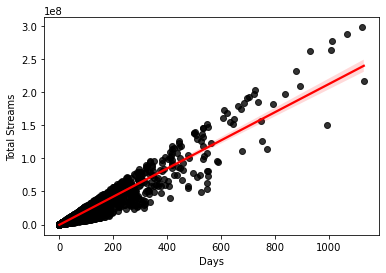

In [21]:
# Correlation between Days (since release) and Total Streams among songs below mean Avg Streams

df2 = df[ df["Avg Streams"] < avg_daily_str]
sns.regplot(x="Days", y="Total Streams", data=df2, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# For songs whose daily streams are below average, the longer they are released, the higher streams they have
# The correlation is also high, yet not as high as its counterpart

<AxesSubplot:xlabel='Top 10 (xTimes)', ylabel='Peak Position (xTimes)'>

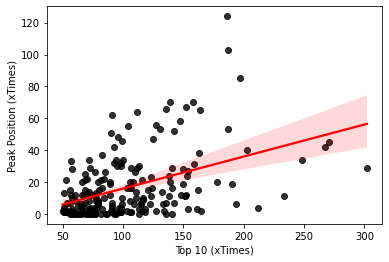

In [22]:
# Correlation between Top 10 (xTimes) and Peak Position (xTimes) among songs with 50+ times inside top 10

# at least 50 times inside top 10
df3 = df[ df["Top 10 (xTimes)"] >= 50]

sns.regplot(x="Top 10 (xTimes)", y="Peak Position (xTimes)", data=df3, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# Regardless of days since release, songs with higher number of times inside top 10 tend to have higher number of times inside peak position 
# However, as the number of times of being inside top 10 goes up, the distribution becomes more dispersed

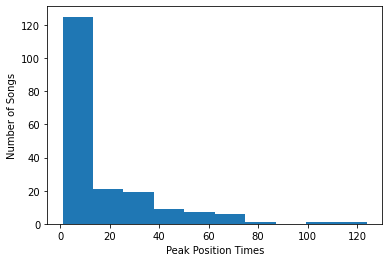

In [23]:
# songs with Peak position = 1

# create a new data frame where Peak Position = 1
df_pp1 = df[df["Peak Position"] == 1]

# histogram
df_pp1['Peak Position (xTimes)'].plot(kind='hist')

# set axis labels
plt.xlabel("Peak Position Times")
plt.ylabel("Number of Songs")

# show plot
plt.show()

# Among songs that have ever reached #1, most of them made it to top 3 within 40 times, while the minority remained on top 3 for 100+ times